In [1]:
#importing libraries
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

In [2]:
from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics

In [3]:
columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","m_failed_logins",
"logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files",
"num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
"same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
"dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
"dst_host_srv_rerror_rate","label"]

In [4]:
attacks_type = {
'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
    }

In [5]:
df = pd.read_csv('/content/kddcup.data_10_percent_corrected.csv',names=columns)

In [6]:
df['label'] = df.label.apply(lambda r: attacks_type[r[:-1]])

In [12]:
#data transformation
def labels(row):
    attacks_type = row['label']
    if(attacks_type == 'normal'):
        return 0
    else:
        return 1

In [13]:
def createLabels(df):
  df['Outcome']= df.apply (lambda row: labels(row), axis=1)
  return df

In [14]:
df = createLabels(df)

In [15]:
df['Outcome'].unique()

array([0, 1])

In [16]:
df.drop(['label'],axis = 1,inplace = True)

In [17]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,m_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


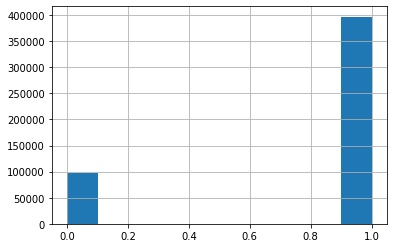

In [18]:
df['Outcome'].hist()

In [19]:
from sklearn.feature_selection import SelectKBest

In [20]:
X = df.iloc[:,1:41]
Y = df.iloc[:,-1]

In [21]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
494016    0
494017    0
494018    0
494019    0
494020    0
Name: Outcome, Length: 494021, dtype: int64

In [22]:
from sklearn import preprocessing

In [23]:
for c in X.columns:
     if str(X[c].dtype) == 'object':
            print(c, "::", X[c].dtype, X[c].value_counts())
            #print(c, "::", T[c].dtype, T[c].value_counts())
            print("=======")

le_X = preprocessing.LabelEncoder()
le_y = preprocessing.LabelEncoder()

for c in X.columns:
    if str(X[c].dtype) == 'object': 
        X[c] = le_X.fit_transform(X[c])
    #if str(T[c].dtype) == 'object':
        #T[c] = le_X.fit_transform(T[c])

Y = le_y.fit_transform(Y)
#C = le_y.fit_transform(C)

protocol_type :: object icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64
service :: object ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
red_i           1
pm_dump         1
tftp_u          1
Name: service, Length: 66, dtype: int64
flag :: object SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64


In [24]:
scaler = Normalizer().fit(X)
X = scaler.transform(X)
np.set_printoptions(precision=3)


In [25]:
X.shape

(494021, 40)

In [26]:
Y.shape

(494021,)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X,Y, test_size = 0.3 , random_state = 101)

In [29]:
X_train1.shape

(345814, 40)

In [30]:
Y_train1.shape

(345814,)

In [31]:
type(X_train1)

numpy.ndarray

In [32]:
# reshape input to be [`asamples, time steps, features]
X_train1 = X_train1.reshape(-1, 1, 40)
X_test1  = X_test1.reshape(-1, 1, 40)

In [33]:
X_train1.shape

(345814, 1, 40)

In [34]:
X_test1.shape

(148207, 1, 40)

In [35]:
Y_train1.shape

(345814,)

In [36]:
Y_test1.shape

(148207,)

In [37]:
from keras.regularizers import l1,l2
from keras.layers import Bidirectional


In [70]:
lstm_output_size = 70

cnn = Sequential()
cnn.add(Convolution1D(128, 2, padding="same",activation="relu",input_shape=(1,40)))
cnn.add(Convolution1D(64, 2, padding="same", activation="relu"))
cnn.add(MaxPooling1D(pool_size=(1)))
cnn.add(LSTM(lstm_output_size))
cnn.add(Dropout(0.1))
cnn.add(Dense(1, activation="sigmoid"))

In [71]:
from keras import backend as K
import keras
optimizer = keras.optimizers.Adam(lr=0.001)
cnn.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
checkpointer = callbacks.ModelCheckpoint(filepath="kddresults/lstm2layer/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger('training_set_iranalysis1.csv',separator=',', append=False)
history = cnn.fit(X_train1, Y_train1, batch_size=lstm_output_size, epochs=50, validation_data=(X_test1, Y_test1),callbacks=[checkpointer,es])

Epoch 1/50
4941/4941 [==============================] - 22s 4ms/step - loss: 0.0220 - accuracy: 0.9926 - val_loss: 0.0096 - val_accuracy: 0.9975
Epoch 2/50
4941/4941 [==============================] - 20s 4ms/step - loss: 0.0085 - accuracy: 0.9975 - val_loss: 0.0078 - val_accuracy: 0.9980
Epoch 3/50
4941/4941 [==============================] - 19s 4ms/step - loss: 0.0070 - accuracy: 0.9979 - val_loss: 0.0066 - val_accuracy: 0.9980
Epoch 4/50
4941/4941 [==============================] - 19s 4ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.0063 - val_accuracy: 0.9980
Epoch 5/50
4941/4941 [==============================] - 19s 4ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0065 - val_accuracy: 0.9981
Epoch 6/50
4941/4941 [==============================] - 22s 5ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0063 - val_accuracy: 0.9984
Epoch 7/50
4941/4941 [==============================] - 20s 4ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0047 - val_ac

In [72]:
loss, accuracy = cnn.evaluate(X_test1, Y_test1)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
y_pred1 = cnn.predict_classes(X_test1)

4632/4632 [==============================] - 5s 1ms/step - loss: 0.0029 - accuracy: 0.9992

Loss: 0.00, Accuracy: 99.92%


In [73]:
accuracy = accuracy_score(Y_test1, y_pred1)
recall = recall_score(Y_test1, y_pred1 , average="binary")
precision = precision_score(Y_test1, y_pred1 , average="binary")
f1 = f1_score(Y_test1, y_pred1, average="binary")

print("confusion matrix")
print("----------------------------------------------")
print("accuracy")
print("%.6f" %accuracy)
print("recall")
print("%.6f" %recall)
print("precision")
print("%.6f" %precision)
print("f1score")
print("%.6f" %f1)

confusion matrix
----------------------------------------------
accuracy
0.999224
recall
0.999184
precision
0.999849
f1score
0.999516


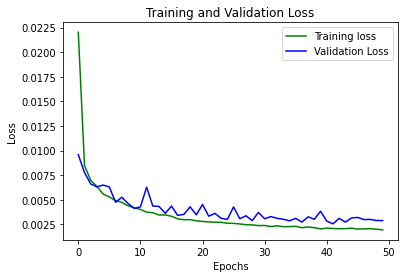

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_train = np.array(history.history['loss'])
loss_val = np.array(history.history['val_loss'])

epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

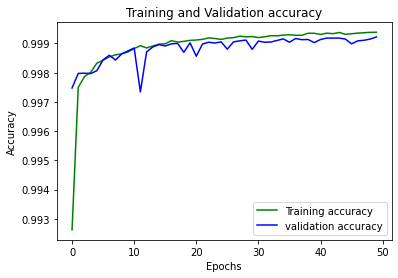

In [76]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5a89b8fdd8>)

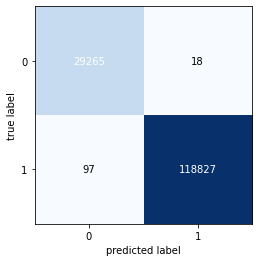

In [77]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test1,y_pred1)
plot_confusion_matrix(conf_mat=mat)